In [11]:

import tensorflow as tf
print(f"TF version:{tf.__version__} and Keras version: {tf.keras.__version__}")

TF version:2.9.1 and Keras version: 2.9.0


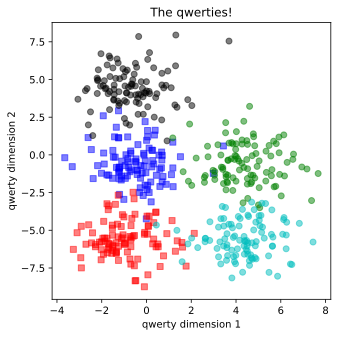

In [2]:
import numpy as np

from jagpascoe_ML_toolkit.createDataFunctions import createQwerties, splitData, plot_classModelDecisionMap
data, labels = createQwerties(clusters=5, nPerClust=100, blur=1.20, centroids=np.array([[0,0],[0,5],[0,-5],[5,0],[5,-5]]), draw=True)
#data, labels = createQwerties(clusters=2, nPerClust=100, blur=1.20, centroids=np.array([[0,0],[0,5]]), draw=True)
data = data.numpy()
labels=labels.numpy()               

In [3]:
import copy
l2=np.zeros(shape=(labels.size,5))
for i in range(labels.size):
    l2[i,labels[i]]=1

labels=copy.deepcopy(l2)


In [4]:
# Set random seed
tf.random.set_seed(42)


# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax'),
    ])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.CategoricalCrossentropy(), 
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['accuracy'])

# 3. Fit the model
history=model_1.fit(data, labels, epochs=20)

model_1.evaluate(data, labels)

2022-10-18 17:27:31.006319: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/20
16/16 [==============================] - 1s 4ms/step - loss: 1.6083 - accuracy: 0.2500
Epoch 2/20
16/16 [==============================] - 0s 4ms/step - loss: 0.9047 - accuracy: 0.6160
Epoch 3/20
16/16 [==============================] - 0s 4ms/step - loss: 0.6872 - accuracy: 0.7340
Epoch 4/20
16/16 [==============================] - 0s 4ms/step - loss: 0.5392 - accuracy: 0.8800
Epoch 5/20
16/16 [==============================] - 0s 5ms/step - loss: 0.3948 - accuracy: 0.9160
Epoch 6/20
16/16 [==============================] - 0s 4ms/step - loss: 0.3080 - accuracy: 0.9100
Epoch 7/20
16/16 [==============================] - 0s 4ms/step - loss: 0.2606 - accuracy: 0.9300
Epoch 8/20
16/16 [==============================] - 0s 4ms/step - loss: 0.2313 - accuracy: 0.9280
Epoch 9/20
16/16 [==============================] - 0s 4ms/step - loss: 0.2136 - accuracy: 0.9280
Epoch 10/20
16/16 [==============================] - 0s 4ms/step - loss: 0.1970 - accuracy: 0.9340
Epoch 11/20
16/16 [

[0.14348731935024261, 0.9440000057220459]

In [5]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 24        
                                                                 
 dense_1 (Dense)             (None, 5)                 45        
                                                                 
Total params: 69
Trainable params: 69
Non-trainable params: 0
_________________________________________________________________


<AxesSubplot:>

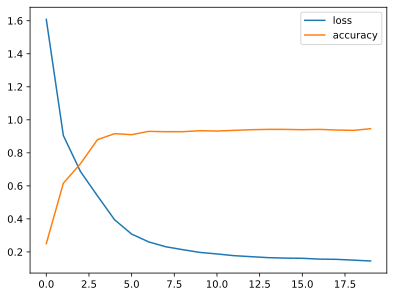

In [6]:
import pandas as pd
pd.DataFrame(history.history).plot()

313/313 [==============================] - 1s 1ms/step
doing multiclass classification...


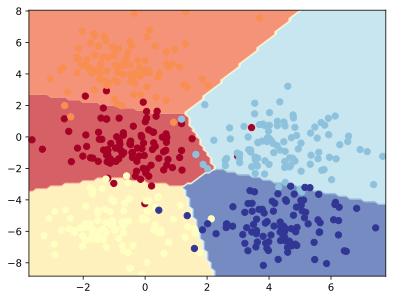

In [7]:
plot_classModelDecisionMap(model=model_1, X=data, y=labels)